# 📏 ATR (Average True Range) Indicator

This notebook explores the **ATR (Average True Range)** indicator using Yahoo Finance data and Pandas. ATR measures market volatility by decomposing the entire range of an asset price for that period.

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
ticker = "AAPL"
stock = yf.Ticker(ticker)
df = stock.history(period="6mo")
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-25 00:00:00-04:00,229.235479,232.707832,229.065854,230.901810,38802300,0.0,0.0
2024-10-28 00:00:00-04:00,232.807625,234.214517,232.039312,232.887436,36087100,0.0,0.0
2024-10-29 00:00:00-04:00,232.588105,233.815399,231.809819,233.156845,35417200,0.0,0.0
2024-10-30 00:00:00-04:00,232.099178,232.957290,229.045901,229.594696,47070900,0.0,0.0
2024-10-31 00:00:00-04:00,228.836355,229.325284,224.875072,225.413895,64370100,0.0,0.0


## 🧮 Calculate ATR

ATR is calculated using the following steps:
1. Compute True Range (TR)
2. Use rolling average (usually 14 periods) to compute ATR

In [7]:
df["H-L"] = df["High"] - df["Low"]
df["H-PC"] = abs(df["High"] - df["Close"].shift(1))
df["L-PC"] = abs(df["Low"] - df["Close"].shift(1))
df["TR"] = df[["H-L", "H-PC", "L-PC"]].max(axis=1)
df["ATR"] = df["TR"].rolling(window=14).mean()
df[["Close", "ATR"]].tail()


,Close,ATR
Date,,
2025-04-17 00:00:00-04:00,196.979996,13.455000
2025-04-21 00:00:00-04:00,193.160004,13.296428
2025-04-22 00:00:00-04:00,199.740005,13.557142
2025-04-23 00:00:00-04:00,204.600006,13.849285
2025-04-24 00:00:00-04:00,208.369995,12.652848


## 📊 Plot ATR with Price

Visualize how ATR reflects periods of high and low volatility.

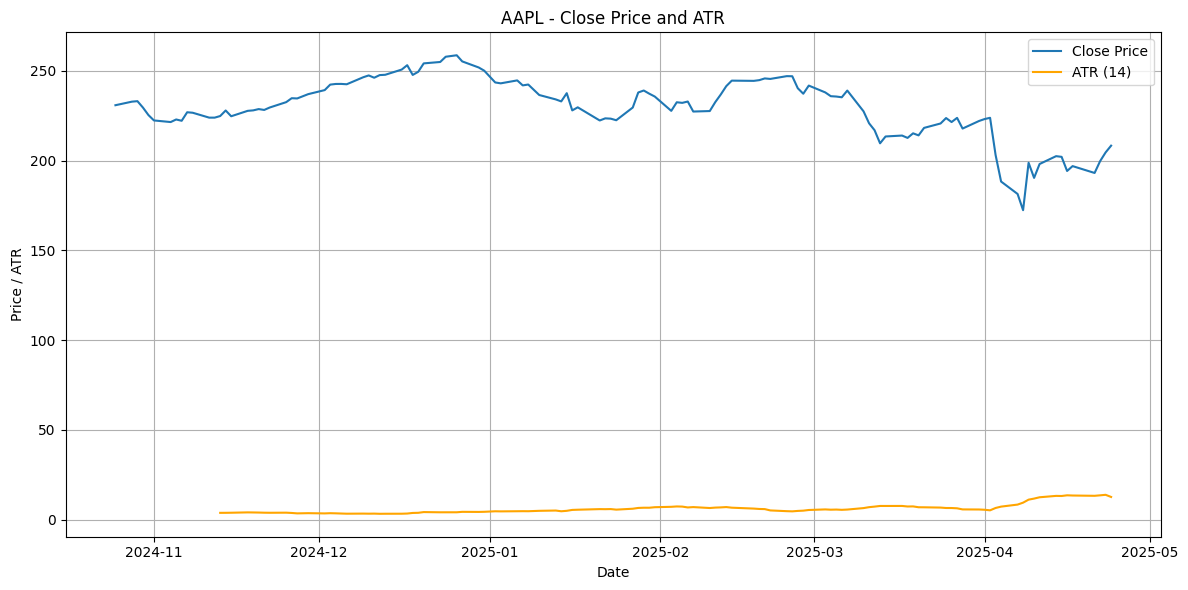

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price")
plt.plot(df.index, df["ATR"], label="ATR (14)", color="orange")
plt.title(f"{ticker} - Close Price and ATR")
plt.xlabel("Date")
plt.ylabel("Price / ATR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📌 Interpretation
- Higher ATR → Higher volatility
- Lower ATR → Market is calm or consolidating

ATR is often used for position sizing and stop-loss decisions.